#### To predict the Test Score of a student that spends a certain number of Hours watching TV

In [84]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [85]:
# sample dataset

df = pd.DataFrame({
    "Hours" : [0, 1, 2, 3, 3, 5, 5, 5, 6, 7, 7, 10],
    "Test Scores" : [96, 85, 82, 74, 95, 68, 76, 84, 58, 65, 75, 50]
})

df_ori = df.copy() # to use later

In [32]:
df.head()

,Hours,Test Scores
0,0,96
1,1,85
2,2,82
3,3,74
4,3,95


Here, 'Hours' is the independendant variable X and 'Test Scores' is the dependent variable Y. Next, we need to find the correlation coefficient. The formula to find it is as follows:
<br><br>
<img src="corr coeff.jpg" alt="Test Scores vs Hours" width="350" height="300">

In [33]:
df["xy"] = df["Hours"] * df["Test Scores"]
df["x^2"] = df["Hours"] ** 2
df["y^2"] = df["Test Scores"] ** 2

In [34]:
df.head()

,Hours,Test Scores,xy,x^2,y^2
0,0,96,0,0,9216
1,1,85,85,1,7225
2,2,82,164,4,6724
3,3,74,222,9,5476
4,3,95,285,9,9025


In [35]:
n = len(df)

sum_xy = sum(df["xy"])

sum_x = sum(df["Hours"])
sum_y = sum(df["Test Scores"])

sum_x_sq = sum(df["x^2"])
sum_x_whole_sq = sum_x ** 2

sum_y_sq = sum(df["y^2"])
sum_y_whole_sq = sum_y ** 2

Now that we have all the values, we can find the correlation coefficient.

In [36]:
# correlation coefficient calculation

r = ((n * sum_xy) - (sum_x * sum_y)) / ((((n * sum_x_sq) - sum_x_whole_sq) ** 0.5) * (((n * sum_y_sq) - sum_y_whole_sq) ** 0.5))

print("Correlation Coefficient = {:.4f}".format(r))

Correlation Coefficient = -0.8313


The correlation is strongly negative. This suggests that as the number of hours spent watching TV increase, test scores decrease. Next, we plot a regression line by calculating the slope and y-intercept. The formula of the regression line where m is the slope and c is the y-intercept is as follows:
<br><br>
<img src="line.png" alt="Test Scores vs Hours" width="130" height="300">
<br><br>
The formula for caculating the slope will be:
<br><br>
<img src="slope.png" alt="Test Scores vs Hours" width="250" height="300">
<br><br>
And finally, the y-intercept can be calculated using the following formula:
<br><br>
<img src="y intercept.png" alt="Test Scores vs Hours" width="110" height="300">

In [87]:
# slope calculation

m = ((n * sum_xy) - (sum_x * sum_y)) / ((n * sum_x_sq) - sum_x_whole_sq)

print("Slope = {:.2f}".format(m))

Slope = -4.07


In [86]:
# y-intercept calcultaion

b = (sum_y / n) - (m * (sum_x / n))

print("Y-Intercept = {:.2f}".format(b))

Y-Intercept = 93.97


Now that we have the slope and y-intercept, we can plot a graph to visualize how this looks.

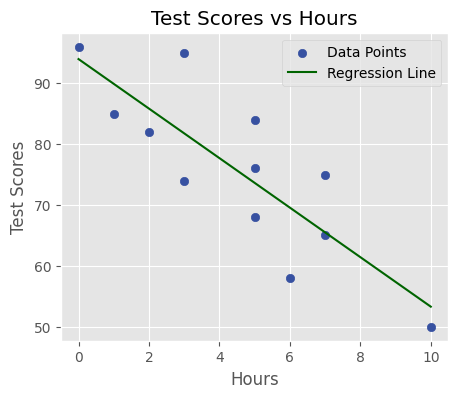

In [83]:
x_line = np.linspace(min(df["Hours"]), max(df["Hours"]), 100)
y_line = m * x_line + b

plt.figure(figsize=(5, 4))
plt.scatter(df_ori["Hours"], df_ori["Test Scores"], color = "#3751A1", label = "Data Points")
plt.plot(x_line, y_line, color = "#006400", label = "Regression Line")
plt.xlabel("Hours")
plt.ylabel("Test Scores")
plt.title("Test Scores vs Hours")
plt.legend()
plt.show()

We can use the line equation to predict the test score of a student who spends 'x' hours watching TV. Let the number of hours be 9. Then:

In [80]:
x = 9 # number of hours
y_hat = m * x + b

print("The Test Score of a Student that spends {} hours spending TV is predicted to be {:.2f}".format(x, y_hat))

The Test Score of a Student that spends 9 hours spending TV is predicted to be 57.36
